## Adding a sparsity constraint on the encoded representations

In the previous example, the representations were only constrained by the size of the hidden layer (**32**). In such a situation, what typically happens is that the hidden layer is learning an approximation of **PCA** (principal component analysis). But another way to constrain the representations to be compact is to add a sparsity contraint on the activity of the hidden representations, so fewer units would "fire" at a given time. In Keras, this can be done by adding an **activity_regularizer** to our Dense layer:

In [ ]:
import keras
import numpy as np
from keras import layers
from keras import regularizers
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
# This is the size of our encoded representations
encoding_dim = 32

input_img = keras.Input(shape=(784,))

# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)  #  This model maps an input to its reconstruction
encoder = keras.Model(input_img, encoded)  # This model maps an input to its encoded representation

encoded_input = keras.Input(shape=(encoding_dim,))  # This is our encoded (32-dimensional) input
decoder_layer = autoencoder.layers[-1]   # Retrieve the last layer of the autoencoder model

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))  # Create the decoder model

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) # np.prod: Return the product of array elements over a given axis. 60000, 28, 28 to 60000, 784
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Let's train this model for **100 epochs** (with the added regularization the model is less likely to overfit and can be trained longer). The models ends with a train loss of 0.11 and test loss of 0.10. The difference between the two is mostly due to the regularization term being added to the loss during training (worth about 0.01).

In [ ]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
# After 50 epochs, the autoencoder seems to reach a stable train/validation loss value of about 0.09. 

Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.2852 - val_loss: 0.1959
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1766 - val_loss: 0.1599
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1517 - val_loss: 0.1419
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1375 - val_loss: 0.1307
Epoch 5/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1280 - val_loss: 0.1228
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1212 - val_loss: 0.1171
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1163 - val_loss: 0.1130
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1128 - val_loss: 0.1101
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1103 - val_loss: 0.1080
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1086 - val_lo

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


In [ ]:
def plot_autoencoded_imgs(n=10):   # How many digits we will display
  plt.figure(figsize=(16, 4))

  for i in range(n):
      # Display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(x_test[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # Display reconstruction
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(decoded_imgs[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

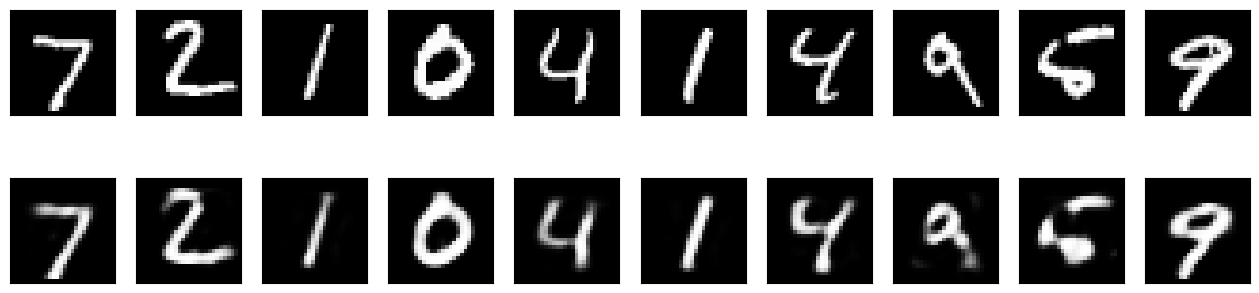

In [ ]:
plot_autoencoded_imgs()

They look pretty similar to the previous model, the only significant difference being the sparsity of the encoded representations. encoded_imgs.mean() yields a value 3.33 (over our 10,000 test images), whereas with the previous model the same quantity was 7.30. So our new model yields encoded representations that are twice sparser.

### Deep AutoEncoder

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 3s 6ms/step - loss: 0.2457 - val_loss: 0.1699
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1531 - val_loss: 0.1366
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1305 - val_loss: 0.1243
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1229 - val_loss: 0.1184
Epoch 5/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1175 - val_loss: 0.1138
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1133 - val_loss: 0.1109
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1096 - val_loss: 0.1068
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1071 - val_loss: 0.1045
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1051 - val_loss: 0.1029
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1034 - val_lo

After 100 epochs, it reaches a train and validation loss of ~0.08, a bit better than our previous models. Our reconstructed digits look a bit better too

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


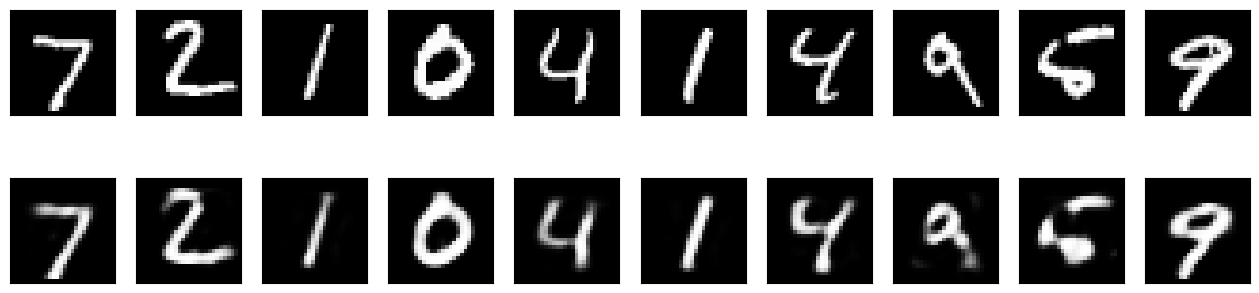

In [ ]:
plot_autoencoded_imgs()

### Reference

https://blog.keras.io/building-autoencoders-in-keras.html